In [6]:
import numpy as np
import os,sys

In [8]:
print(sys.version)
print(sys.executable)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
c:\Users\Willi\anaconda3\envs\SpecsimV2\python.exe


In [10]:
sys.path.append('../')
os.chdir('../')
# os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
print('Current working directory is', os.getcwd())

Current working directory is C:\Users\Willi\Documents\GitHub


In [11]:
# import some general packages
import sys,os
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate
from matplotlib.colors import LogNorm
from datetime import date

# Load some stuff from specsim
# Run in main folder specsim/
# os.chdir('../') # if running in examples/ folder, need to be in main folder
os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
print('Current working directory is', os.getcwd()) # should be /GitHub/specsim/
from specsim import objects, load_inputs, functions, plot_tools, obs_tools
from specsim.load_inputs import fill_data

Current working directory is C:\Users\Willi\Documents\GitHub\specsim


In [12]:
config_path = './configs/modhis_snr.cfg'
# config_path = './configs/melby_test_config.cfg'
print("Does the config file exist?", os.path.exists(config_path)) # make sure the current working directory is in GitHub (specsim parent folder)

Does the config file exist? True


In [17]:
# os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
# configfile = './configs/modhis_snr.cfg' # define our config file name and path
configfile = './configs/melby_test_config.cfg'
so    = objects.load_object(configfile)  # Load the contents of the config file into the so "storage object"
cload = fill_data(so)        # Initiate the fill_data class which runs an observation and stores the results in so

------FILLING OBJECT--------
Teff set to 200.0
H band mag set to 18.0
Auto AO Mode
AO mag is 17.1 in R band for defaultK AO star (H=default)
AO mode chosen: LGS_ON
HO WFE is 150
tt dynamic is 2.16


OSError: /Users/Willi/Documents/Research/Specsim/Coupling_Data/tel/tel_throughput.csv not found.

To change one parameter in the storage object:

In [47]:
so.stel.teff = 5800             # redefine the stellar temperature
cload = fill_data(so)           # redo filling the data

------FILLING OBJECT--------
Teff set to 5800
H band mag set to 18.0
Auto AO Mode
AO mag is 18.94 in R band for defaultK AO star (H=default)
AO mode chosen: LGS_OFF
HO WFE is 160
tt dynamic is 2.24
Nframes set to 1
Texp per frame set to 900.0


In [5]:
# Updates one thing without the others like set tracking band, in addition to others
new_band = "J"
new_texp = 0.1
cload.set_tracking_band_texp(so, new_band, new_texp)

-----Reloading Tracking Band and Exposure Time------
Tracking FWHM=3.175055934112001pix


OSError: ./data/instrument/feicam/blocking_filter.TXT not found.

To plot parts of the so:

Choose pixel or res_element for snrtype


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

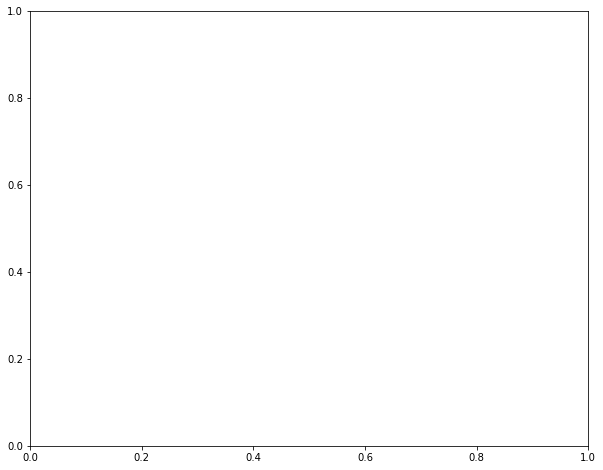

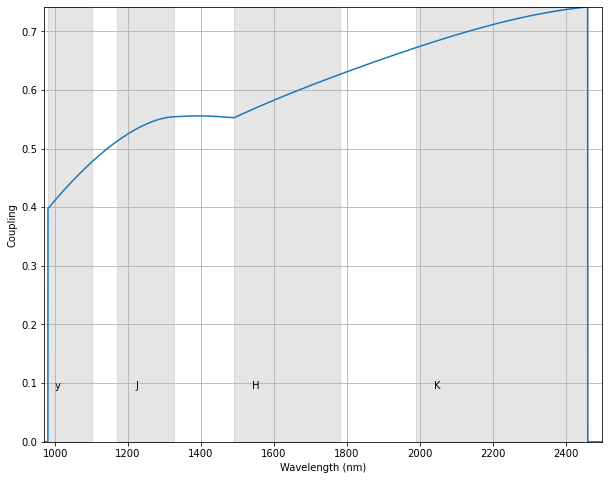

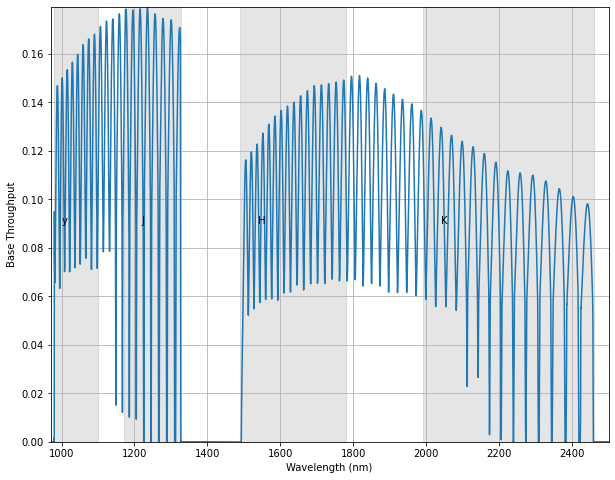

In [24]:
savepath = './'
plot_tools.plot_snr(so,snrtype=0,savepath=savepath)
plot_tools.plot_coupling(so,savepath=savepath) # these ones are weird
plot_tools.plot_base_throughput(so,savepath=savepath)
plot_tools.plot_tracking_bands(so,savepath=savepath)
plot_tools.plot_background_spectra(so,savepath=savepath)

In [11]:
import zipfile
import subprocess

In [5]:

# Define the directory containing the zip subfolders
base_directory = "C:/Users/Willi/Documents/Research/Stellar_Data/Profile/"

# Walk through all files and directories within the base directory
# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if file.endswith(".zip"):
#             file_path = os.path.join(root, file)
#             # Define the directory to extract to (same as zip file's directory)
#             extract_to = os.path.splitext(file_path)[0]
#             # Create the extraction directory if it doesn't exist
#             os.makedirs(extract_to, exist_ok=True)
#             # Extract the zip file
#             with zipfile.ZipFile(file_path, 'r') as zip_ref:
#                 zip_ref.extractall(extract_to)
#             print(f"Extracted {file_path} to {extract_to}")

In [12]:
def extract_cmp_file(file_path, extract_to):
    # Example command for a hypothetical tool
    command = f"cmp_tool -extract {file_path} -output {extract_to}"
    subprocess.run(command, shell=True)

In [15]:
# Define the directory containing the .cmp subfolders
base_directory = "C:/Users/Willi/Documents/Research/Stellar_Data/profile/"

# Walk through all files and directories within the base directory
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith(".cmp"):
            file_path = os.path.join(root, file)
            # Define the directory to extract to (same as cmp file's directory)
            extract_to = os.path.splitext(file_path)[0]
            # Create the extraction directory if it doesn't exist
            os.makedirs(extract_to, exist_ok=True)
            # Extract the cmp file
            extract_cmp_file(file_path, extract_to)
            print(f"Extracted {file_path} to {extract_to}")

In [23]:
# Calculate the wavelength of peak emission for a blackbody object at a given temperature (30C = 303.15K)
b = 2.898e-3 # Wien's displacement constant in m*K
T = 303.15 # Temperature in Kelvin
peak_wavelength = b / T
print("Peak wavelength in nm is:", peak_wavelength*1e9)

Peak wavelength in nm is: 9559.623948540328


In [24]:
sonora_path = 'C:/Users/Willi/Documents/Research/Stellar_Data/sonora_folder/profile/t200g17nc_m0.0.cmp'
print("Does the file exist?", os.path.exists(config_path))

Does the file exist? True


In [10]:
sonora_folder='C:/Users/Willi/Documents/GitHub/specsim/data/stel/sonora/'
stel_file = sonora_folder + 'sp_t200g10nc_m0.0'
print("Does the file exist?", os.path.exists(stel_file))

Does the file exist? True
